In [342]:
import requests
from bs4 import BeautifulSoup as bs

In [343]:
product=input('Enter the product')


Enter the productsmart watch


In [344]:
url='https://www.flipkart.com/search?q={}'.format(product)
headers={'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win 64 ; x64) Apple WeKit /537.36(KHTML , like Gecko) Chrome/80.0.3987.162 Safari/537.36'}
scrap=requests.get(url=url,headers=headers)
data=bs(scrap.text)

# Main Product Page

In [345]:
for i in data.find_all('a',class_='_1fQZEK'):
    href=str(i.get('href'))
    main_url='https://www.flipkart.com'
    sub_url=main_url+href
    reviews_page=sub_url.replace('/p/','/product-reviews/')

# Reviews Page

In [346]:
rev=requests.get(url=reviews_page,headers=headers)
page=bs(rev.text)
rev_pag_num=int(page.find_all('div',class_='_2MImiq _1Qnn1K')[0].text.split('123456')[0].split('of')[-1].strip())

In [347]:
Product_Name=page.find_all('div',class_='_1AtVbE col-10-12')[0].text.split('Reviews')[0]

In [348]:
Rating=page.find_all('div',class_='_3LWZlK')[0].text
Num_of_Ratings=page.find_all('span',class_='_2_R_DZ')[0].text.split('Ratings')[0]
Price=page.find_all('div',class_='_3I9_wc')[0].text

In [349]:
reviews=[]
for i in range(rev_pag_num):
    for i in page.find_all('div',class_='col _2wzgFH K0kLPL'):
        reviews.append(i.text.split('READ MORE')[0])

In [350]:
rev_rating=[]
for i in reviews:
    rev_rating.append(i[0][0])

In [351]:
review=[]
for i in reviews:
    review.append(i.split(i[0])[-1])

In [352]:
len(review)

590

# DataFrame

In [353]:
import pandas as pd

In [354]:
df=pd.DataFrame(zip(review,rev_rating),columns=['Review','Review_Rating'])

In [355]:
df['Review'].iloc[6]

'DelightfulVery happy with the performance of the machine as of now, will post the long term usage experience after few months...'

# word cloud

In [356]:
result=' '.join(review)

In [357]:
from wordcloud import WordCloud,STOPWORDS
from PIL import Image

In [358]:
stop_w=set(STOPWORDS)

In [359]:
wc=WordCloud(stopwords=stop_w,).generate(result)

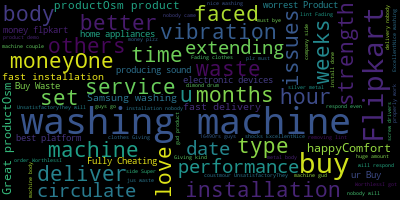

In [360]:
wc.to_image()

# Sentiment Analysis


In [361]:
df['Review_Rating'].value_counts()

5    236
1    236
4    118
Name: Review_Rating, dtype: int64

In [362]:
n_df=df[(df['Review_Rating']=='5') |(df['Review_Rating']=='1')]

In [363]:
n_df['Review_Rating'].replace({'5':1,"1":0},inplace=True)

C:\Users\gusai\AppData\Local\Temp\ipykernel_15920\2235786162.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n_df['Review_Rating'].replace({'5':1,"1":0},inplace=True)


In [364]:
n_df.reset_index(drop=True,inplace=True)

In [365]:
n_df.head()

,Review,Review_Rating
0,Great productOsm product and fast delivery and...,1
1,Don't waste your moneyOne of the worrest Produ...,0
2,UnsatisfactoryThey will just deliver the machi...,0
3,WorthlessI got this machine couple of months a...,0
4,"ExcellentNice washing machine gud product, dem...",1


In [366]:
import re
from nltk.stem.porter import PorterStemmer

In [367]:
ps=PorterStemmer()

In [368]:
corpus=[]
for i in range(len(n_df)):
    review=re.sub('[^a-zA-Z]',' ',n_df['Review'][i])
    review=review.lower()
    review=review.split()
    corpus.append(review)
    
   
    
    

In [369]:
from sklearn.model_selection import train_test_split

In [380]:
x_train,x_test,y_train,y_test=train_test_split(corpus,n_df['Review_Rating'],test_size=0.2)

In [371]:
x_train=[' '.join(words) for words in x_train]
x_test=[' '.join(word) for word in x_test]

In [372]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(ngram_range=(1,2))
X_train=cv.fit_transform(x_train)
X_test=cv.transform(x_test)

In [373]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier().fit(X_train,y_train)

In [374]:
y_pred=classifier.predict(X_test)

In [334]:
from sklearn.model_selection import KFold,cross_val_score

In [335]:
scores = cross_val_score(classifier, X_train, y_train, cv=10, scoring='accuracy')

In [336]:
scores.mean()

1.0

In [381]:
y_pred

array([1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1], dtype=int64)

In [375]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [376]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        77\n           1       1.00      1.00      1.00        65\n\n    accuracy                           1.00       142\n   macro avg       1.00      1.00      1.00       142\nweighted avg       1.00      1.00      1.00       142\n'

In [377]:
confusion_matrix(y_test,y_pred)

array([[77,  0],
       [ 0, 65]], dtype=int64)

In [378]:
accuracy_score(y_test,y_pred)

1.0

In [379]:
y_test.unique()

array([1, 0], dtype=int64)